# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

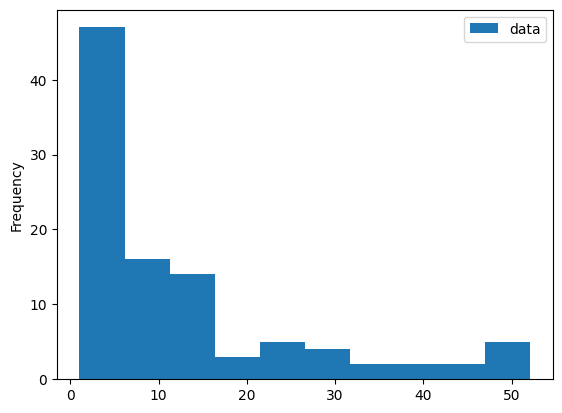

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

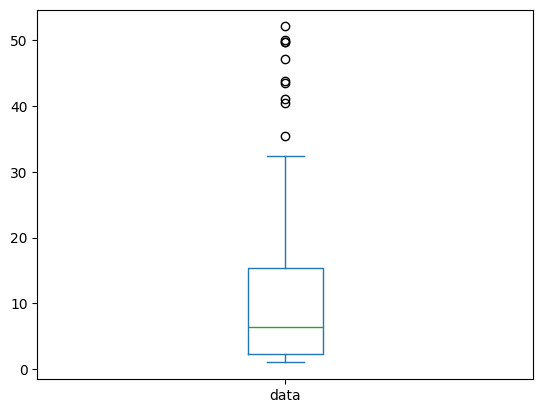

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.


This horizontal bar chart is modeled after the clean visual design examples in Chapter 2 (p. 52–68) of *Storytelling With Data*. It uses my Milestone 1 cybersecurity dataset to show the top five most common password lengths. The design avoids unnecessary gridlines and legends, and instead uses direct labeling to make the story clear and accessible.


In [5]:
from sklearn.datasets import fetch_kddcup99
import pandas as pd

# Load a subset for simplicity
data = fetch_kddcup99(subset='SA', percent10=True, as_frame=True)
df = data.frame.copy()

# Preview
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


## 4. Storytelling With Data Graph

This horizontal bar chart uses the KDD Cup 99 dataset, which aligns with the cybersecurity focus of my Milestone 1 project. It highlights the five most common network intrusion types in a simplified and clean format. The chart follows visual storytelling best practices by minimizing clutter, using direct data labeling, and drawing attention to key insights without distractions.

![Intrusion Chart](intrusion_chart.png)


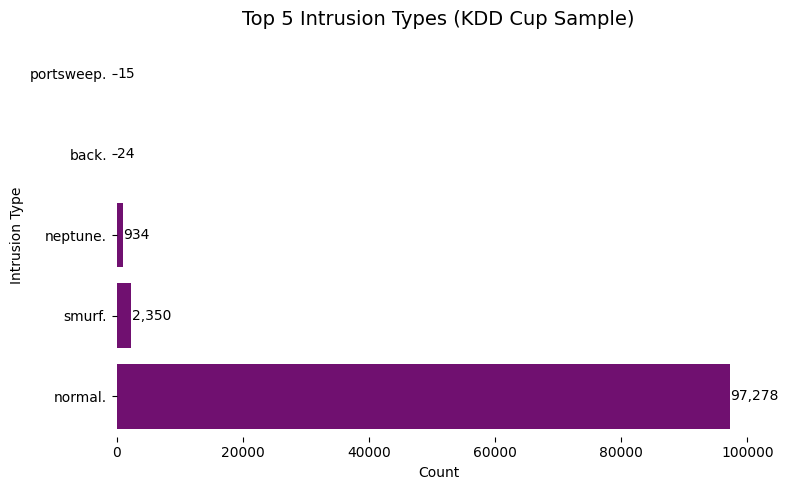

Chart saved as intrusion_chart.png


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure labels are decoded properly
df['labels'] = df['labels'].astype(str).str.replace("b'", "").str.replace("'", "")

# Count top 5 intrusion types
attack_counts = df['labels'].value_counts().head(5).sort_values()

# Plot the chart
plt.figure(figsize=(8, 5), dpi=100)
sns.barplot(x=attack_counts.values, y=attack_counts.index, color='purple')

# Add value labels
for i, count in enumerate(attack_counts.values):
    plt.text(count + 50, i, f"{count:,}", va='center')

plt.title("Top 5 Intrusion Types (KDD Cup Sample)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Intrusion Type")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("intrusion_chart.png", bbox_inches='tight', dpi=100)
plt.show()
print("Chart saved as intrusion_chart.png")

